In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('./train_titanic.csv') #한글파일시 ,encoding = utf-8추가
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#데이터 셋의 Null 값 갯수확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace= True)
print('데이터 셋 Null값 갯수' ,titanic_df.isnull().sum().sum())

데이터 셋 Null값 갯수 0


In [9]:
#데이터 셋의 Null 값 갯수확인
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [16]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


In [17]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [25]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
titanic_df.groupby(['Sex','Survived']).count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

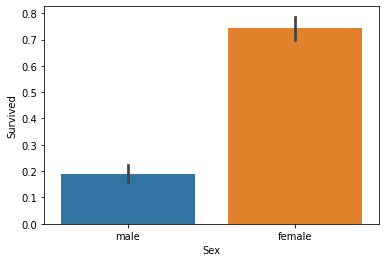

In [19]:
sns.barplot(x='Sex', y = "Survived", data= titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

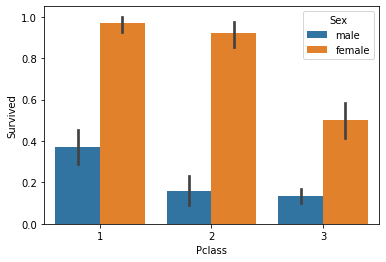

In [20]:
sns.barplot(x='Pclass',y='Survived', hue= 'Sex', data=titanic_df)

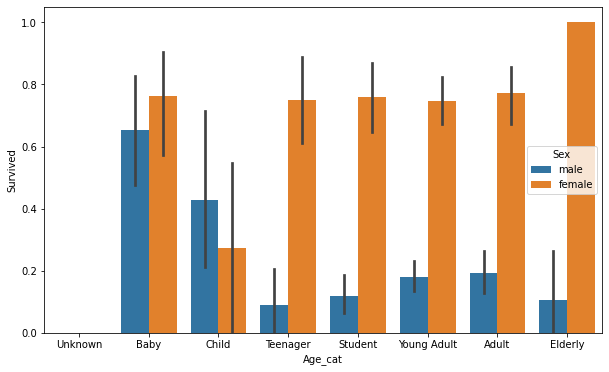

In [29]:
def get_category(age):
    cat = ""
    if age <= -1 : cat = "Unknown"
    elif age <= 5 : cat = "Baby"
    elif age <=12 : cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = "Adult"
    else : cat = "Elderly"

    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown','Baby', "Child", "Teenager", "Student", "Young Adult", "Adult","Elderly"]

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = "Survived", hue="Sex", data= titanic_df, order=group_names )
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [27]:
#label encoding

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

        return dataDF
titanic_df =encode_features(titanic_df)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,7,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,7,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,7,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,7,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,2,C


시작

In [62]:
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace= True)
    return df

#알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis =1, inplace = True)
    return df

#레이블 인코딩 수행 #범주형 데이터로 바꾸러고
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] #맨 첫번째 글자만 따내기 위해 사용
    features = ['Cabin', 'Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#data preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [66]:
#원본 데이터를 재로딩하고, feature데이터 셋과 Label데이터 셋 추출 #종속변수, #독립변수

titanic_df = pd.read_csv('./train_titanic.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1) 

x_titanic_df = transform_features(x_titanic_df)


In [67]:
x_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 분류
dt_clf = DecisionTreeClassifier(random_state=11) #의사결정나무
rf_clf = RandomForestClassifier(random_state=11) #랜덤포레스트
lr_clf = LogisticRegression() #로지스틱 회귀 # random_state 지정 필요X?/

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도 : 0.7877


In [73]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.0,2,0,18.0000,7,3
662,1,1,47.0,0,0,25.5875,4,3
382,3,1,32.0,0,0,7.9250,7,3
331,1,1,45.5,0,0,28.5000,2,3
149,2,1,42.0,0,0,13.0000,7,3
...,...,...,...,...,...,...,...,...
269,1,0,35.0,0,0,135.6333,2,3
337,1,0,41.0,0,0,134.5000,4,0
91,3,1,20.0,0,0,7.8542,7,3
80,3,1,22.0,0,0,9.0000,7,3


In [74]:
#RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassfier 정확도:{0:.4f}' .format(accuracy_score(y_test, rf_pred)))

RandomForestClassfier 정확도:0.8547


In [75]:
#LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도 : {0:4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도 : 0.849162


C:\Users\pureb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds= 5):

    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy =  accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증{0} 정확도:{1:4f}".format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print("평균 정확도:{0:4f}".format(mean_score))
exec_kfold(dt_clf, folds= 5)


교차 검증0 정확도:0.754190
교차 검증1 정확도:0.780899
교차 검증2 정확도:0.786517
교차 검증3 정확도:0.769663
교차 검증4 정확도:0.820225
평균 정확도:0.782299


In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv =5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증{0} 정확도 : {1:4f}".format(iter_count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))


교차 검증0 정확도 : 0.743017
교차 검증1 정확도 : 0.775281
교차 검증2 정확도 : 0.792135
교차 검증3 정확도 : 0.786517
교차 검증4 정확도 : 0.842697
평균 정확도: 0.7879


In [81]:
#하이퍼파라미터: 내가 설정 할 수 있는 것
#파라미터: 모델 내부에서 결정되는 변수
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 
               'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8] }

grid_dclf = GridSearchCV(dt_clf, param_grid= parameters, scoring="accuracy", cv=5)
grid_dclf.fit(x_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터:", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 :{0:.4f}".format(grid_dclf.best_score_))
best_dclf =  grid_dclf.best_estimator_

dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.871508


정밀도와 재현율

In [86]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [87]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터 재로딩, 데이터 가공, 학습데이터/테스트 분할
titanic_df = pd.read_csv('./train_titanic.csv')

y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)

x_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\pureb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


분류 결정 임계값에 따른 Positive 예측 확률 변화

In [89]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print("pred_proba array에서 앞 3개만 샘플로 추출 \n:", pred_proba[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46172445 0.53827555]
 [0.87862224 0.12137776]
 [0.87724968 0.12275032]]


In [90]:
#예측 확률과 결과값 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n:', pred_proba_result[:3])

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
: [[0.46172445 0.53827555 1.        ]
 [0.87862224 0.12137776 0.        ]
 [0.87724968 0.12275032 0.        ]]


In [91]:
from sklearn.preprocessing import Binarizer #Binarizer = 이항변수화

x = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

#임계값(threshold) 보다 같거나 작으면 0, 크면 1 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [92]:
#임계값
custom_threshold = 0.5

#predict_proba() 반환값의 두번째 컬럼->positive클래스  컬럼 하나만 추출해서 이항변수화 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [93]:
#임계값 변경
custom_threshold = 0.4

#predict_proba() 반환값의 두번째 컬럼->positive클래스  컬럼 하나만 추출해서 이항변수화 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


In [96]:
#테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #임계값 리스트 객체내의 값을 차례로 반복(iteration)하면서 평가
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds) 

임계값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임계값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임계값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임계값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임계값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


In [104]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1 일 때 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1] 

#실제 값 데이터 셋과 레이블 값이 1 일 때 예측 확률을 precision_recall_curve 인자로 입력
precision,  recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:',thresholds.shape)
print('반환된 precisions 배열의 shape:',precision.shape)
print('반환된 recalls 배열의 shape:',recalls.shape)

print("임곗값 5 samples: ", thresholds[:5])
print("정밀도 5 samples : ", precision[:5])
print("재현률 5 samples:" , recalls[:5])

반환된 분류 결정 임곗값 배열의 shape: (143,)
반환된 precisions 배열의 shape: (144,)
반환된 recalls 배열의 shape: (144,)
임곗값 5 samples:  [0.10394577 0.10394795 0.10397243 0.10746376 0.10892659]
정밀도 5 samples :  [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
재현률 5 samples: [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [107]:

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

샘플 추출을 위한 임곗값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [108]:
# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precision[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


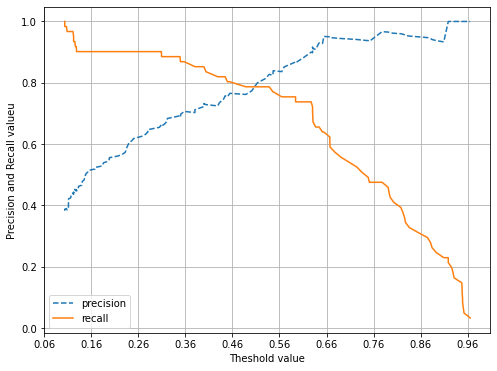

In [112]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:thresholds_boundary], linestyle = "--", label= "precision")
    plt.plot(thresholds, recalls[0:thresholds_boundary], label = 'recall')

    #임계값 x축의 scale을 0,1 단위로 변경
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    #x축, y축 label과 legend, grid설정
    plt.xlabel('Theshold value'); plt.ylabel('Precision and Recall valueu')
    plt.legend(); plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

ROC곡선, AUC

In [113]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:4f}'.format(f1))

F1 스코어: 0.780488


In [124]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy =  accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)

    #f1 score print
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현률:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임계값: 0.4
오차행렬
[[99 19]
 [10 51]]
정확도:0.8380, 정밀도:0.7286, 재현률:0.8361, F1:0.7786
임계값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656, 재현률:0.8033, F1:0.7840
임계값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현률:0.7869, F1:0.7805
임계값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364, 재현률:0.7541, F1:0.7931
임계값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현률:0.7377, F1:0.8036


In [115]:
from sklearn.metrics import roc_curve

#레이블 값이 1 일 떄 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임곗값에 따른 fpr, tpr 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값: [0.97 0.65 0.63 0.59 0.49 0.4  0.31 0.15 0.12 0.11 0.1 ]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.059 0.127 0.161 0.237 0.483 0.61  0.703 0.814]
샘플 임곗값별 TPR: [0.033 0.639 0.705 0.754 0.787 0.852 0.885 0.902 0.934 0.967 0.984]


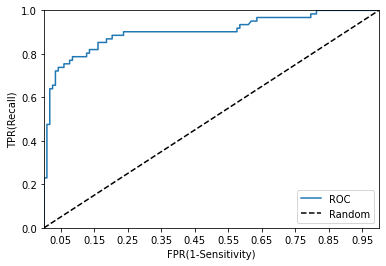

In [121]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    #ROC Curve를 Plot 곡선으로 그림
    plt.plot(fprs, tprs, label = "ROC")

    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random')

    #FPR x축의 Scale을 0,1 단위로 변경, X,Y 축명 설정등

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel("TPR(Recall)")
    plt.legend()
    plt.show()
roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])


In [123]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score =  roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024
